In [91]:
import numpy as np
import pandas as pd

In [92]:
df=pd.read_csv('placement (1).csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [93]:
x=df.iloc[:,0:1]

In [94]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [95]:
y=df.iloc[:,-1]

In [96]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [97]:
class linear_regression:
    def __init__(self):
        self.m=None
        self.b=None
    
    def fit(self,x,y):
        num=0
        den=0
        for i in range(len(x)):
            num+=((y.iloc[i]-y.mean())*(x.iloc[i]-x.mean()))
            den+=((x.iloc[i]-x.mean())*(x.iloc[i]-x.mean()))
        
        self.m=num/den
        self.b=y.mean()-(self.m*x.mean())
        print(self.m.values[0])
        print(self.b.values[0])
    
    def predict(self,x):
        return ((self.m*x)+self.b).values[0]

In [208]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
x_test.head()

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93


In [143]:
y_test.head()

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
Name: package, dtype: float64

In [ ]:
lr = linear_regression()

In [ ]:
lr.fit(x_train,y_train)

0.5742564727019197
-1.0270069374542108


In [103]:
lr.predict(x_test.iloc[0]['cgpa'])

np.float64(2.7803134765595168)

In [ ]:
for i in range(len(y_test)):
    residuals = lr.predict(x_test.iloc[i]['cgpa']) - y_test.iloc[i]
    squared_residuals = residuals**2

mse = np.mean(squared_residuals)

rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 0.1916670169028878


In [302]:
import numpy as np

class lr_using_gd:
    def __init__(self, learning_rate=0.001, epoch=100):
        self.m = 0
        self.b = 0
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.history_m = []
        self.history = []

    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        n = len(x)

        for i in range(self.epoch):
            y_predict = self.m * x + self.b
            y_predict = y_predict.squeeze()
            self.history_m.append(self.m)
            error =y - y_predict
            loss = np.average(error**2)
            self.history.append(loss)
            print(f"Epochs: {i}- training loss is: {loss}")
            x = x.squeeze()
            dm = -2 / n * np.sum(x * error)
            db = -2 / n * np.sum(error)

            self.m -= self.learning_rate * dm
            self.b -= self.learning_rate * db

        print(f"m is {self.m}")
        print(f"b is {self.b}")
        import matplotlib.pyplot as plt
        plt.plot(self.history)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")

    def predict(self, x):
        return self.m * x + self.b


In [303]:
lr_gd=lr_using_gd()

Epochs: 0- training loss is: 9.47749625
Epochs: 1- training loss is: 7.662012823777916
Epochs: 2- training loss is: 6.1995233968909575
Epochs: 3- training loss is: 5.02139339127052
Epochs: 4- training loss is: 4.072333229949081
Epochs: 5- training loss is: 3.3078035945936506
Epochs: 6- training loss is: 2.691925193186264
Epochs: 7- training loss is: 2.195794943149729
Epochs: 8- training loss is: 1.7961295483129305
Epochs: 9- training loss is: 1.474172812718433
Epochs: 10- training loss is: 1.2148154114575827
Epochs: 11- training loss is: 1.0058858093367102
Epochs: 12- training loss is: 0.8375790501538443
Epochs: 13- training loss is: 0.7019966096396193
Epochs: 14- training loss is: 0.5927757173391104
Epochs: 15- training loss is: 0.5047907514929335
Epochs: 16- training loss is: 0.43391269336524385
Epochs: 17- training loss is: 0.37681535219883894
Epochs: 18- training loss is: 0.33081926692534414
Epochs: 19- training loss is: 0.2937659589303254
Epochs: 20- training loss is: 0.2639166345

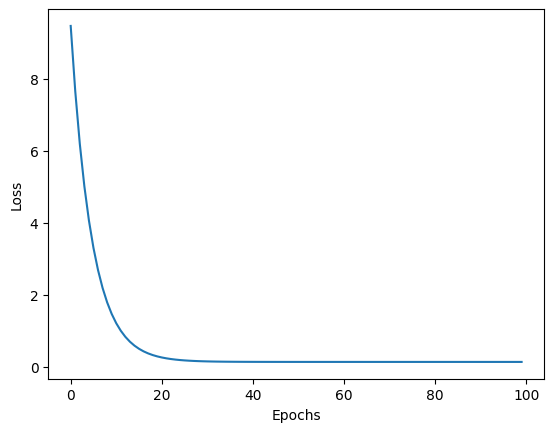

In [304]:
lr_gd.fit(x_train,y_train)

In [305]:
lr_gd.predict(x_test.iloc[0]['cgpa'])

np.float64(2.861772276914093)

In [ ]:
for i in range(len(y_test)):
    residuals = lr_gd.predict(x_test.iloc[i]['cgpa']) - y_test.iloc[i]
    squared_residuals = residuals**2

mse = np.mean(squared_residuals)

rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 0.15694260121869563
